In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAplha','fDist','class']

df=pd.read_csv("magic04.data",names=cols)

In [3]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAplha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
df['class']=(df['class']=="g").astype(int)

In [6]:
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAplha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


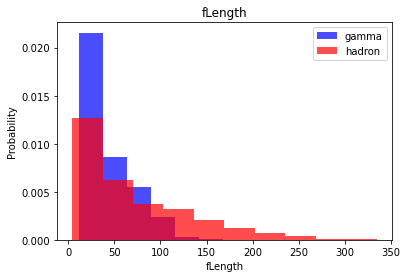

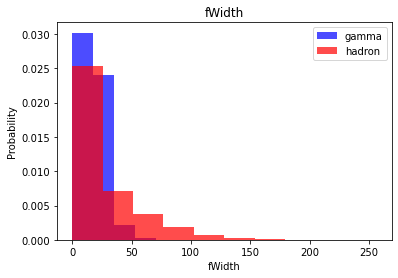

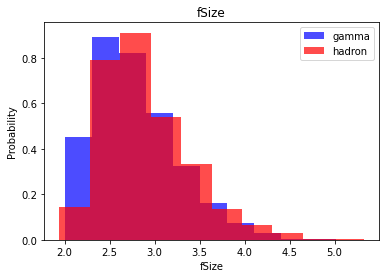

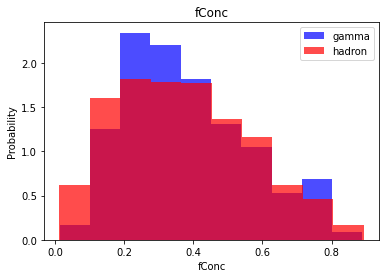

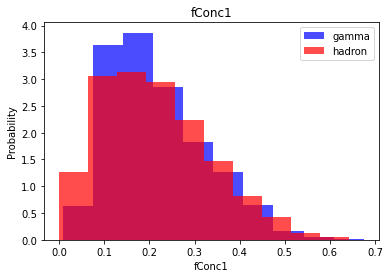

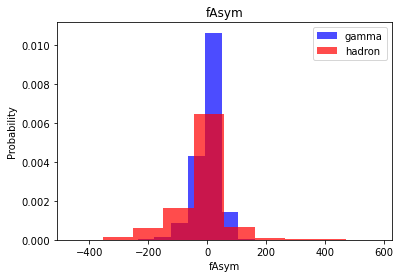

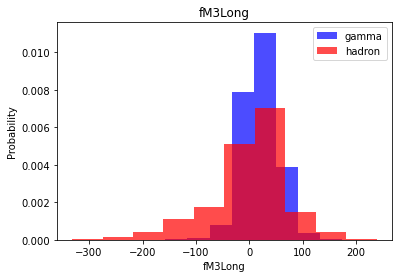

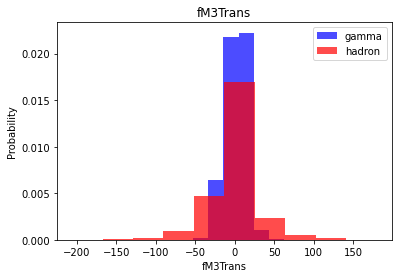

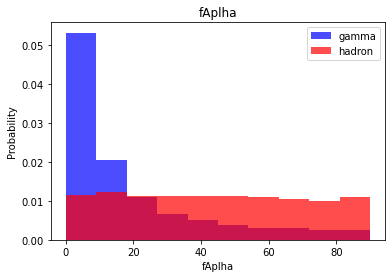

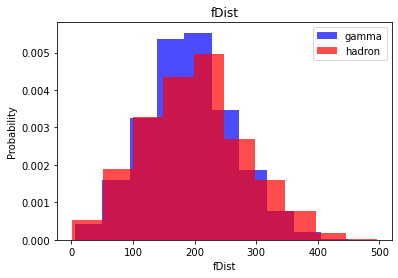

In [7]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

this shows us the difference in data of gamma and hadron rays between different
features. Like in fLength we se that the length of hadron rays are generally bigger than gamma rays. The asymmetry of hadron rays is generally greater than gamma rays. The fAlpha graph shows that haddron rays are more evenly distibuted.

# Train,Validation,Test datasets

In [8]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [9]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7379
4033


the training dataset is not balanced, we have more data on gamma rays than hadron rays. we can fix this with the following code. we will also scale the values as values in different columns are varied , some being in hundreds while some being less than 1. this will not generate a good model therefore we have to scale it.

In [10]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


def scale_dataset(df,oversample=True):
    x=df[df.columns[:-1]].values
    y=df[df.columns[-1]].values
    
    if(oversample):
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)
    
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    
    data = np.hstack((x,np.reshape(y,(-1,1)))) #np.reshape used because x is 2 dimensional array and y is 1 dimensional array, both need to be of the same dimensions
    
    return data,x,y

In [11]:
train,x_train,y_train=scale_dataset(train,oversample=True)
valid,x_valid,y_valid=scale_dataset(valid,oversample=False)
test,x_test,y_test=scale_dataset(test,oversample=False)# oversampling false so as to better test the trained data

In [12]:
sum(y_train==1)

7379

In [13]:
sum(y_train==0)

7379

# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred=knn_model.predict(x_test)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1316
           1       0.88      0.83      0.85      2488

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.82      0.81      0.81      3804



# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model=GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [20]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53      1316
           1       0.75      0.84      0.79      2488

    accuracy                           0.71      3804
   macro avg       0.68      0.66      0.66      3804
weighted avg       0.70      0.71      0.70      3804



# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr_model=LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred=lr_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70      1316
           1       0.87      0.76      0.81      2488

    accuracy                           0.76      3804
   macro avg       0.75      0.77      0.75      3804
weighted avg       0.78      0.76      0.77      3804



# SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svm_model=SVC()
svm_model.fit(x_train, y_train)

SVC()

In [29]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1316
           1       0.92      0.85      0.88      2488

    accuracy                           0.85      3804
   macro avg       0.83      0.85      0.84      3804
weighted avg       0.86      0.85      0.85      3804



# Neural Net

In [30]:
import tensorflow as tf

In [35]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [45]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                     loss='binary_crossentropy',
                    metrics=['accuracy'])
    history=nn_model.fit(
    x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
    return nn_model,history

16 nodes, dropout 0, lr 0.01, batch size 32


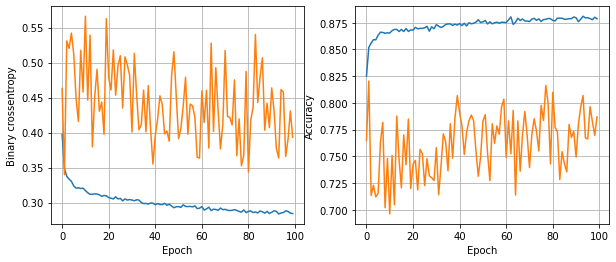

119/119 [==============================] - 0s 910us/step - loss: 0.3806 - accuracy: 0.8491
16 nodes, dropout 0, lr 0.01, batch size 63


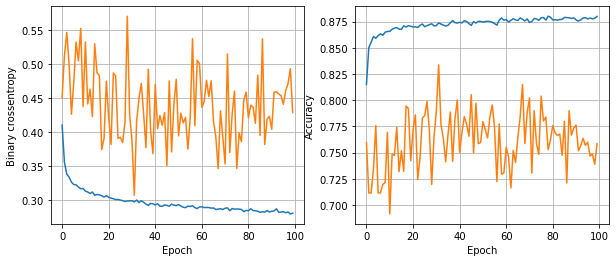

119/119 [==============================] - 0s 916us/step - loss: 0.3572 - accuracy: 0.8499
16 nodes, dropout 0, lr 0.01, batch size 128


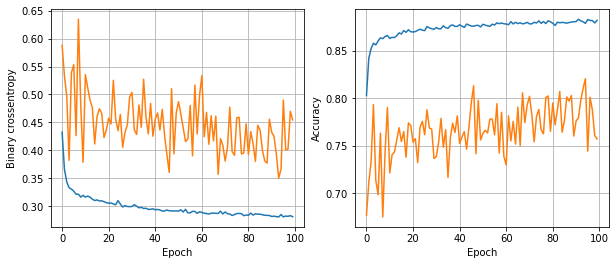

119/119 [==============================] - 0s 921us/step - loss: 0.3487 - accuracy: 0.8562
16 nodes, dropout 0, lr 0.005, batch size 32


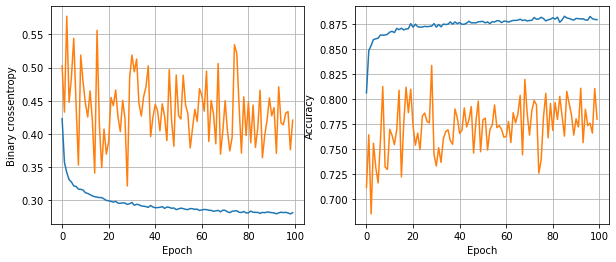

119/119 [==============================] - 0s 882us/step - loss: 0.3579 - accuracy: 0.8552
16 nodes, dropout 0, lr 0.005, batch size 63


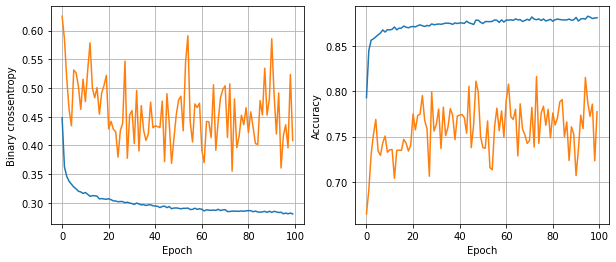

119/119 [==============================] - 0s 820us/step - loss: 0.3494 - accuracy: 0.8557
16 nodes, dropout 0, lr 0.005, batch size 128


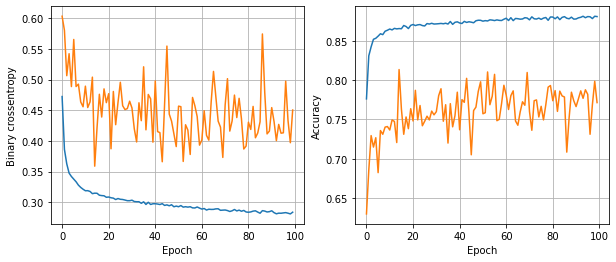

119/119 [==============================] - 0s 949us/step - loss: 0.3539 - accuracy: 0.8607
16 nodes, dropout 0, lr 0.001, batch size 32


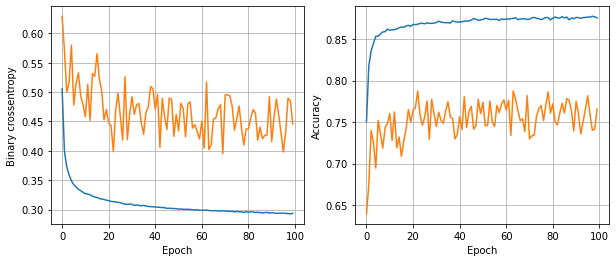

119/119 [==============================] - 0s 891us/step - loss: 0.3434 - accuracy: 0.8596
16 nodes, dropout 0, lr 0.001, batch size 63


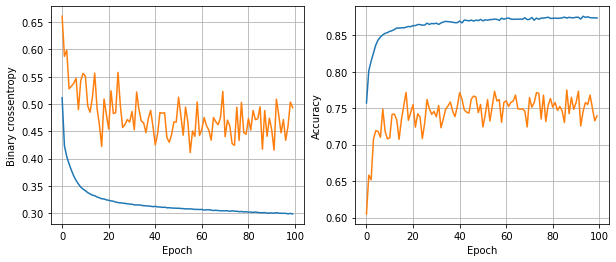

119/119 [==============================] - 0s 887us/step - loss: 0.3358 - accuracy: 0.8615
16 nodes, dropout 0, lr 0.001, batch size 128


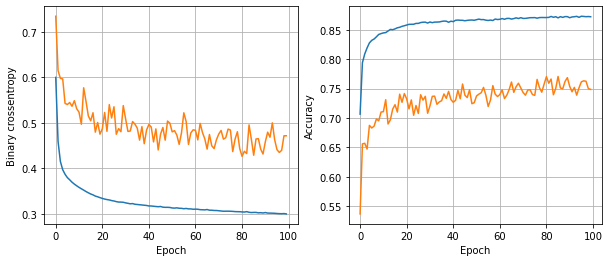

119/119 [==============================] - 0s 888us/step - loss: 0.3459 - accuracy: 0.8573
16 nodes, dropout 0.2, lr 0.01, batch size 32


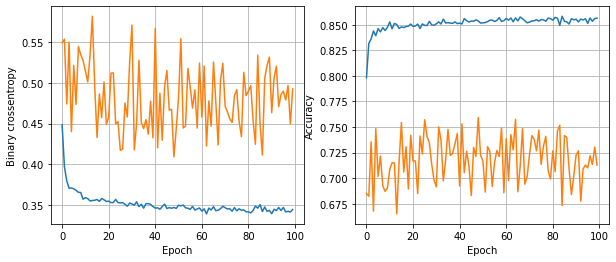

119/119 [==============================] - 0s 1ms/step - loss: 0.3388 - accuracy: 0.8628
16 nodes, dropout 0.2, lr 0.01, batch size 63


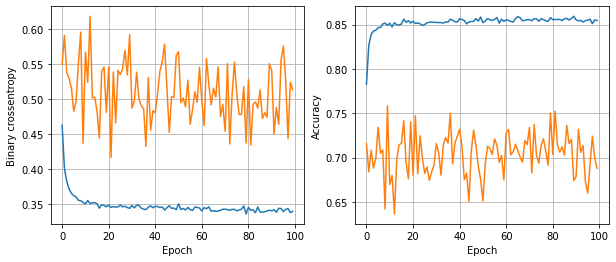

119/119 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8623
16 nodes, dropout 0.2, lr 0.01, batch size 128


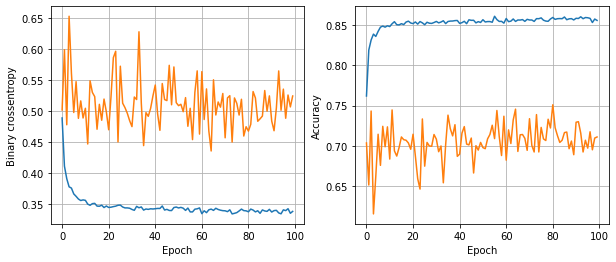

119/119 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.005, batch size 32


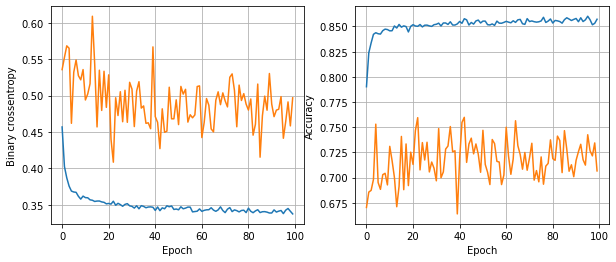

119/119 [==============================] - 0s 892us/step - loss: 0.3391 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.005, batch size 63


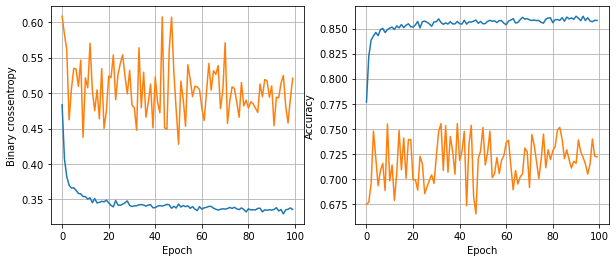

119/119 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.005, batch size 128


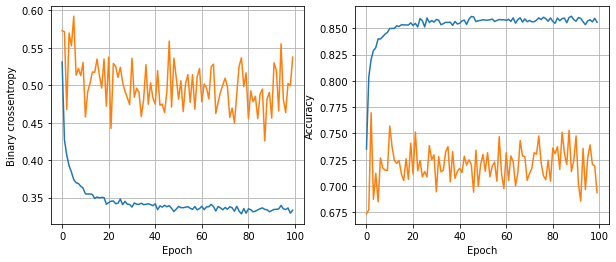

119/119 [==============================] - 0s 927us/step - loss: 0.3274 - accuracy: 0.8636
16 nodes, dropout 0.2, lr 0.001, batch size 32


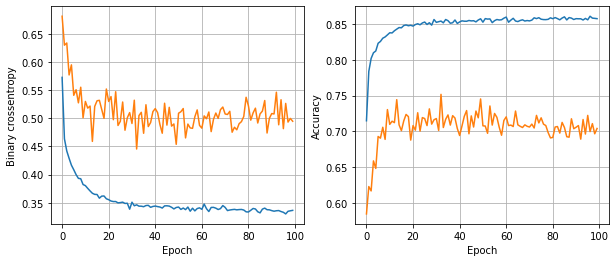

119/119 [==============================] - 0s 968us/step - loss: 0.3295 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.001, batch size 63


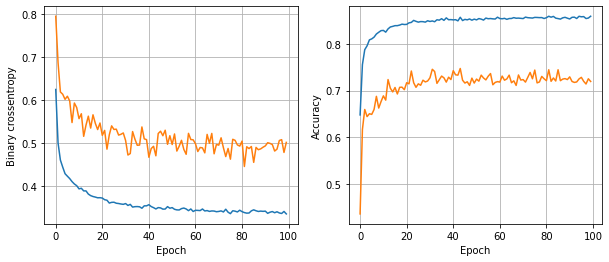

119/119 [==============================] - 0s 886us/step - loss: 0.3376 - accuracy: 0.8633
16 nodes, dropout 0.2, lr 0.001, batch size 128


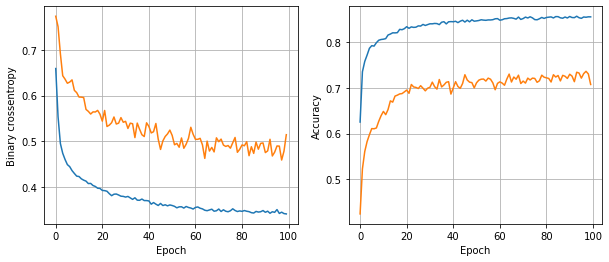

119/119 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8591
32 nodes, dropout 0, lr 0.01, batch size 32


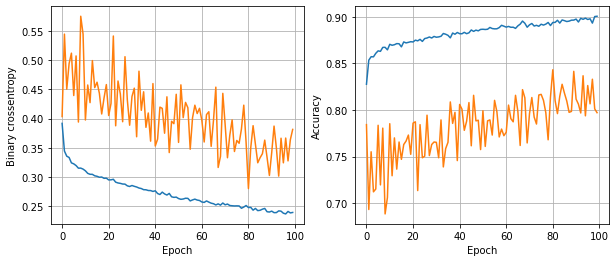

119/119 [==============================] - 0s 888us/step - loss: 0.4879 - accuracy: 0.8299
32 nodes, dropout 0, lr 0.01, batch size 63


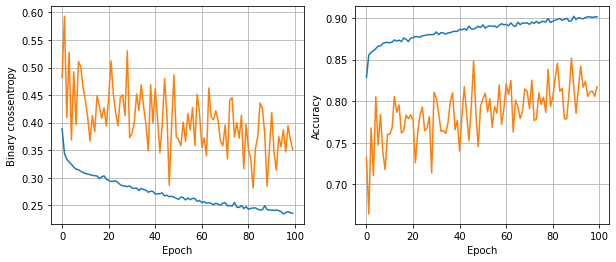

119/119 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8368
32 nodes, dropout 0, lr 0.01, batch size 128


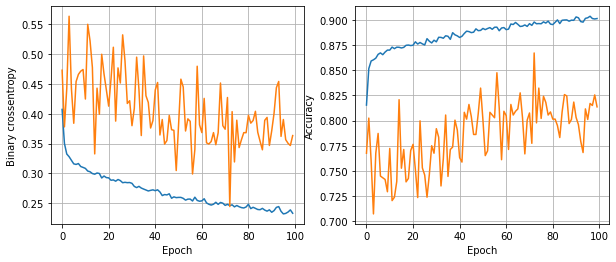

119/119 [==============================] - 0s 927us/step - loss: 0.4248 - accuracy: 0.8475
32 nodes, dropout 0, lr 0.005, batch size 32


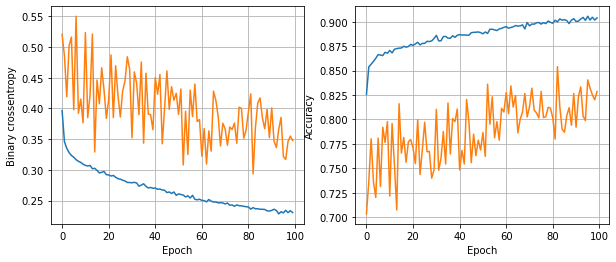

119/119 [==============================] - 0s 846us/step - loss: 0.4737 - accuracy: 0.8386
32 nodes, dropout 0, lr 0.005, batch size 63


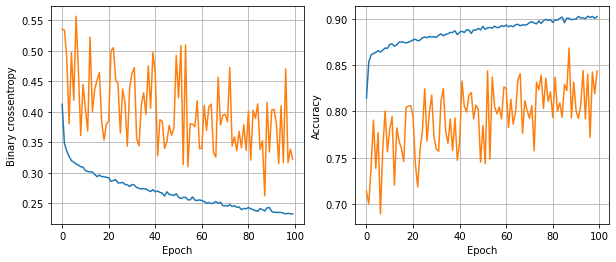

119/119 [==============================] - 0s 927us/step - loss: 0.4296 - accuracy: 0.8441
32 nodes, dropout 0, lr 0.005, batch size 128


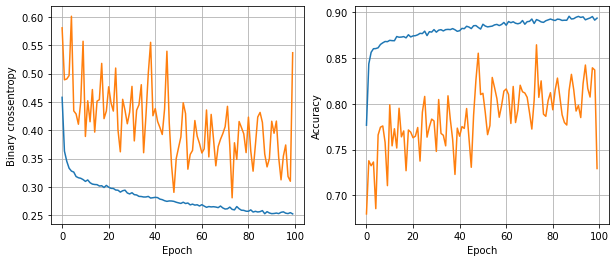

119/119 [==============================] - 0s 926us/step - loss: 0.3652 - accuracy: 0.8562
32 nodes, dropout 0, lr 0.001, batch size 32


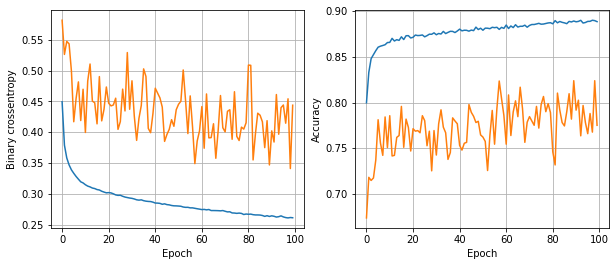

119/119 [==============================] - 0s 927us/step - loss: 0.3494 - accuracy: 0.8559
32 nodes, dropout 0, lr 0.001, batch size 63


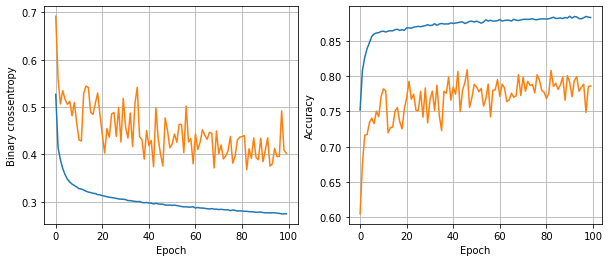

119/119 [==============================] - 0s 794us/step - loss: 0.3569 - accuracy: 0.8483
32 nodes, dropout 0, lr 0.001, batch size 128


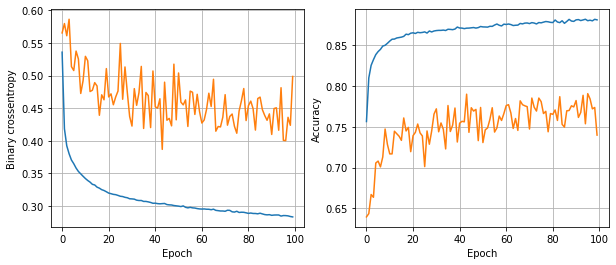

119/119 [==============================] - 0s 927us/step - loss: 0.3362 - accuracy: 0.8615
32 nodes, dropout 0.2, lr 0.01, batch size 32


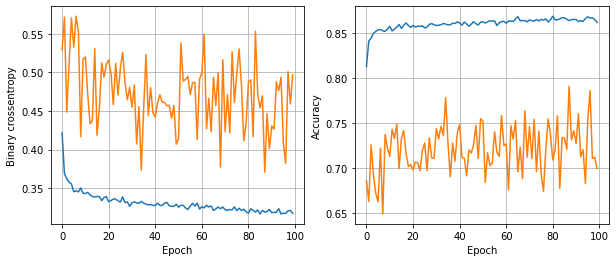

119/119 [==============================] - 0s 794us/step - loss: 0.3267 - accuracy: 0.8667
32 nodes, dropout 0.2, lr 0.01, batch size 63


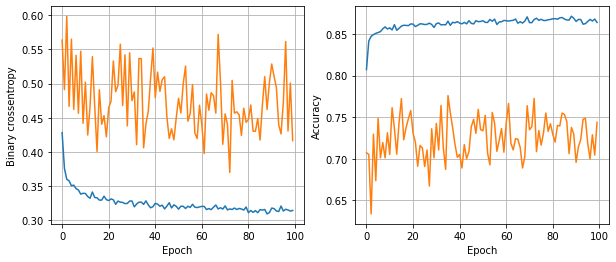

119/119 [==============================] - 0s 794us/step - loss: 0.3363 - accuracy: 0.8630
32 nodes, dropout 0.2, lr 0.01, batch size 128


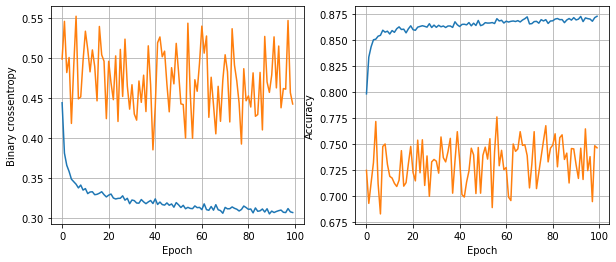

119/119 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8680
32 nodes, dropout 0.2, lr 0.005, batch size 32


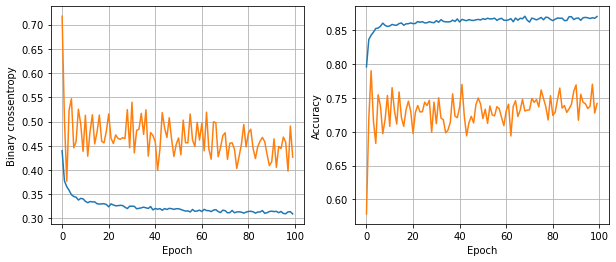

119/119 [==============================] - 0s 794us/step - loss: 0.3240 - accuracy: 0.8644
32 nodes, dropout 0.2, lr 0.005, batch size 63


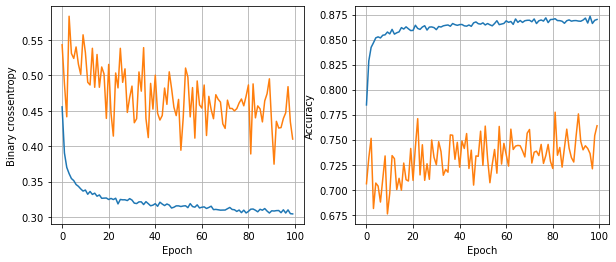

119/119 [==============================] - 0s 926us/step - loss: 0.3293 - accuracy: 0.8646
32 nodes, dropout 0.2, lr 0.005, batch size 128


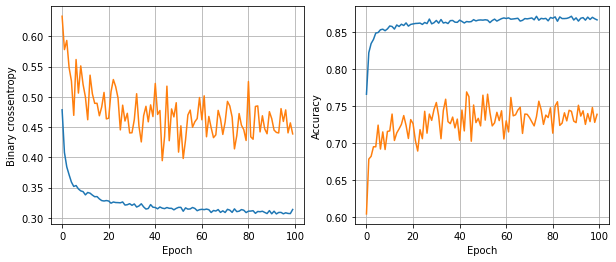

119/119 [==============================] - 0s 795us/step - loss: 0.3326 - accuracy: 0.8654
32 nodes, dropout 0.2, lr 0.001, batch size 32


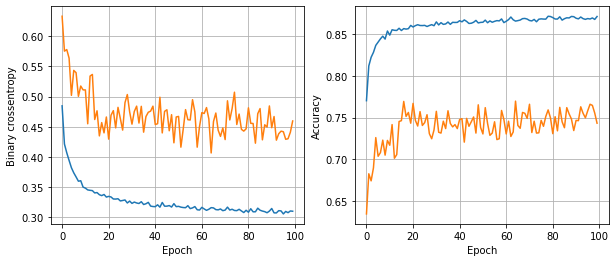

119/119 [==============================] - 0s 927us/step - loss: 0.3272 - accuracy: 0.8659
32 nodes, dropout 0.2, lr 0.001, batch size 63


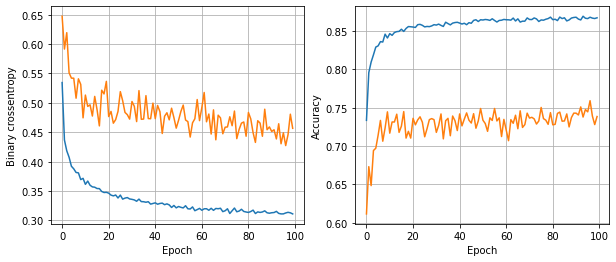

119/119 [==============================] - 0s 794us/step - loss: 0.3291 - accuracy: 0.8667
32 nodes, dropout 0.2, lr 0.001, batch size 128


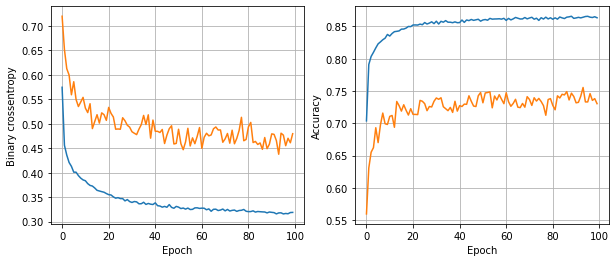

119/119 [==============================] - 0s 927us/step - loss: 0.3315 - accuracy: 0.8628
64 nodes, dropout 0, lr 0.01, batch size 32


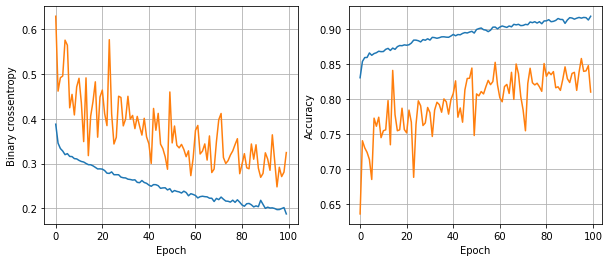

119/119 [==============================] - 0s 794us/step - loss: 0.5471 - accuracy: 0.8446
64 nodes, dropout 0, lr 0.01, batch size 63


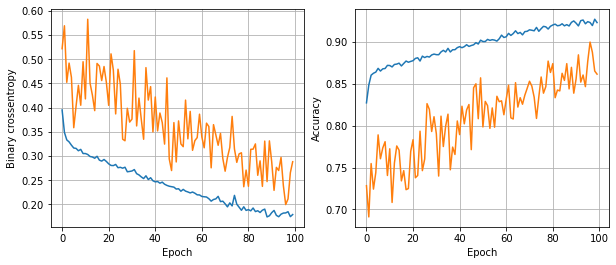

119/119 [==============================] - 0s 794us/step - loss: 0.6619 - accuracy: 0.8297
64 nodes, dropout 0, lr 0.01, batch size 128


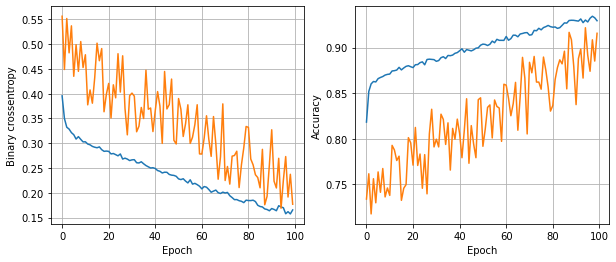

119/119 [==============================] - 0s 795us/step - loss: 0.6700 - accuracy: 0.8247
64 nodes, dropout 0, lr 0.005, batch size 32


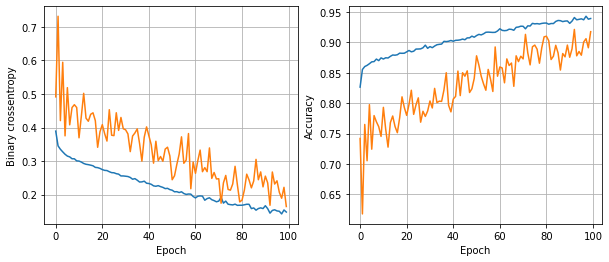

119/119 [==============================] - 0s 794us/step - loss: 0.8235 - accuracy: 0.8197
64 nodes, dropout 0, lr 0.005, batch size 63


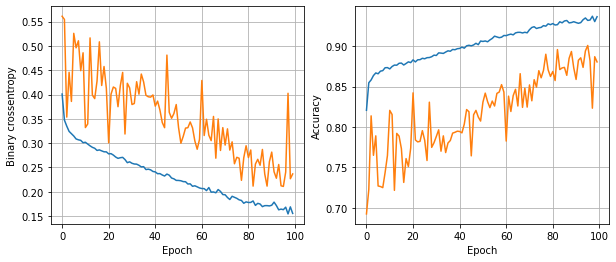

119/119 [==============================] - 0s 828us/step - loss: 0.6554 - accuracy: 0.8328
64 nodes, dropout 0, lr 0.005, batch size 128


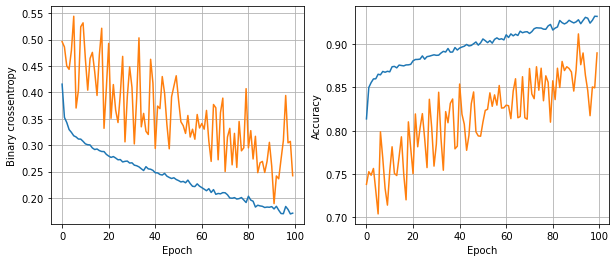

119/119 [==============================] - 0s 794us/step - loss: 0.5583 - accuracy: 0.8212
64 nodes, dropout 0, lr 0.001, batch size 32


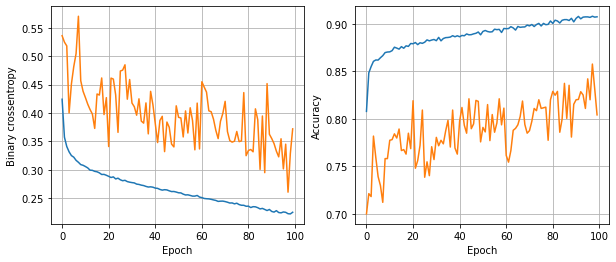

119/119 [==============================] - 0s 1ms/step - loss: 0.3934 - accuracy: 0.8483
64 nodes, dropout 0, lr 0.001, batch size 63


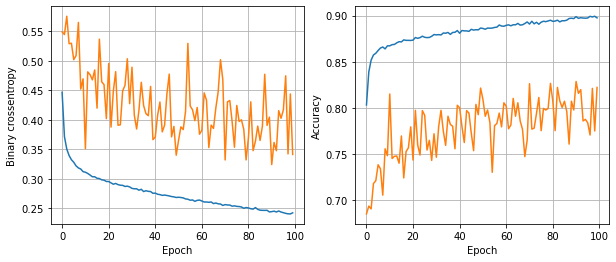

119/119 [==============================] - 0s 927us/step - loss: 0.3711 - accuracy: 0.8486
64 nodes, dropout 0, lr 0.001, batch size 128


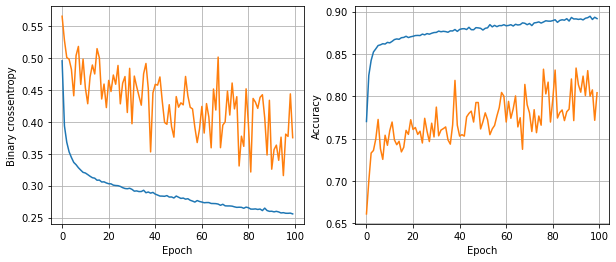

119/119 [==============================] - 0s 893us/step - loss: 0.3549 - accuracy: 0.8494
64 nodes, dropout 0.2, lr 0.01, batch size 32


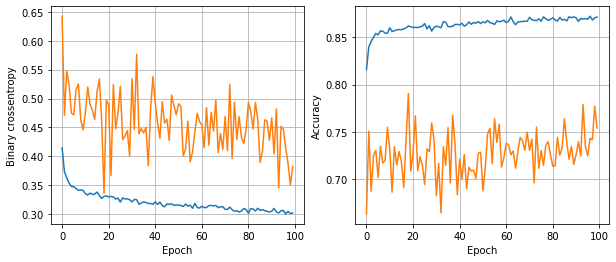

119/119 [==============================] - 0s 926us/step - loss: 0.3651 - accuracy: 0.8554
64 nodes, dropout 0.2, lr 0.01, batch size 63


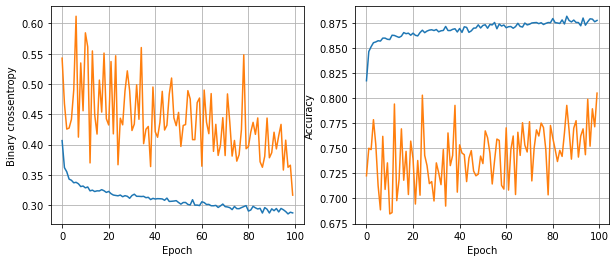

119/119 [==============================] - 0s 794us/step - loss: 0.3759 - accuracy: 0.8570
64 nodes, dropout 0.2, lr 0.01, batch size 128


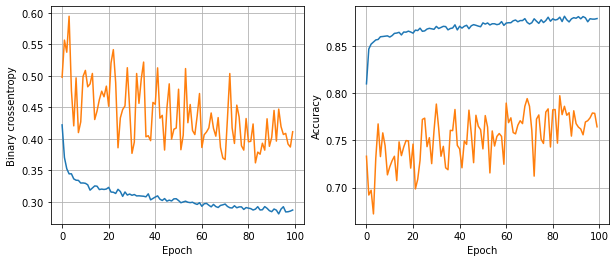

119/119 [==============================] - 0s 927us/step - loss: 0.3435 - accuracy: 0.8588
64 nodes, dropout 0.2, lr 0.005, batch size 32


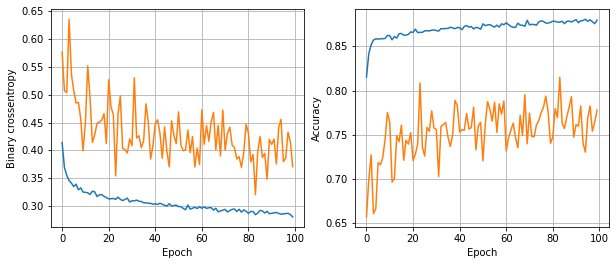

119/119 [==============================] - 0s 926us/step - loss: 0.3515 - accuracy: 0.8546
64 nodes, dropout 0.2, lr 0.005, batch size 63


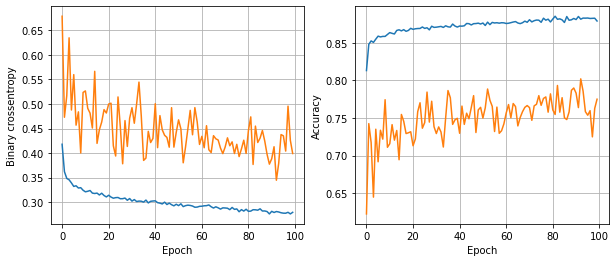

119/119 [==============================] - 0s 794us/step - loss: 0.3385 - accuracy: 0.8599
64 nodes, dropout 0.2, lr 0.005, batch size 128


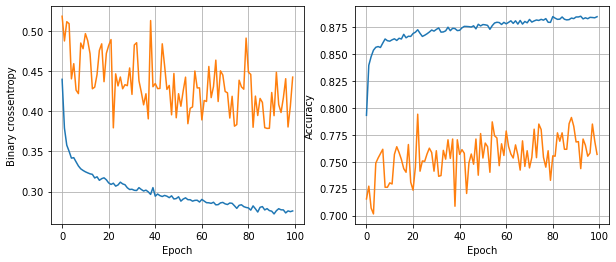

119/119 [==============================] - 0s 926us/step - loss: 0.3276 - accuracy: 0.8675
64 nodes, dropout 0.2, lr 0.001, batch size 32


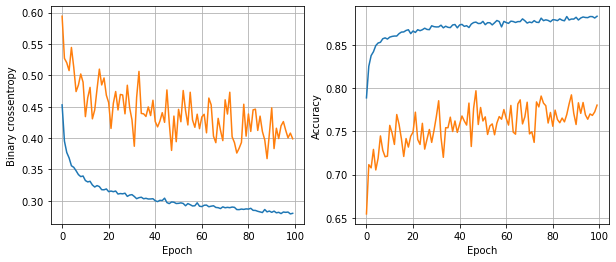

119/119 [==============================] - 0s 927us/step - loss: 0.3339 - accuracy: 0.8636
64 nodes, dropout 0.2, lr 0.001, batch size 63


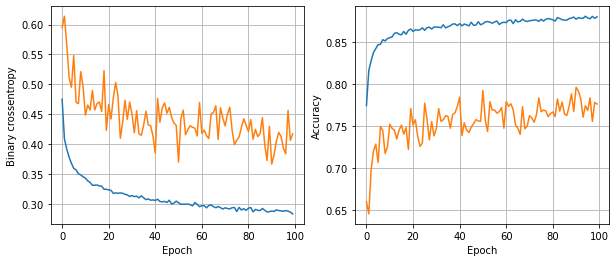

119/119 [==============================] - 0s 927us/step - loss: 0.3317 - accuracy: 0.8638
64 nodes, dropout 0.2, lr 0.001, batch size 128


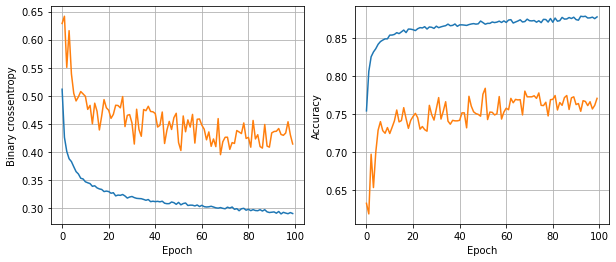

119/119 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8630


In [47]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,63,128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss=model.evaluate(x_valid,y_valid)[0]
                if(val_loss<least_val_loss):
                    least_val_loss=val_loss
                    least_loss_model=model

In [48]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 767us/step


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1316
           1       0.89      0.93      0.91      2488

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

